# Linear Regression

## Simple Linear Regression
**Description**-
A machine learning model to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

### Importing the required libraries & dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Importing dataset
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Analysis

In [3]:
# Shape of the dataset
dataset.shape

(25, 2)

In [4]:
# Descriptive statistic summary
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Checking the null values, data-types etc. of the column i.e concise summary of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Manipulation

In [13]:
x = dataset.iloc[:,:1]
y = dataset.iloc[:,1:]

In [14]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [15]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [16]:
# Sorting the dataset - 
# Sorting 'Scores' column in descending order
sort = dataset.sort_values(by = 'Scores', ascending = False)
sort.head(10)

,Hours,Scores
15,8.9,95
6,9.2,88
24,7.8,86
10,7.7,85
8,8.3,81
23,6.9,76
3,8.5,75
19,7.4,69
18,6.1,67
11,5.9,62


In [17]:
# Filtering the dataset -
# Filterig all those records from the dataset whose score is greater than 80 and hours is greater than 8
filtered_data = (dataset['Scores'] > 80) & (dataset['Hours'] > 8)
# Applying filter to the dataset
filter_df = dataset[filtered_data]
filter_df

,Hours,Scores
6,9.2,88
8,8.3,81
15,8.9,95


In [18]:
# Sampling random records
sample_10 = dataset.sample(n=10)
sample_10

,Hours,Scores
6,9.2,88
15,8.9,95
19,7.4,69
12,4.5,41
24,7.8,86
9,2.7,25
14,1.1,17
20,2.7,30
8,8.3,81
22,3.8,35


### Data Visualization

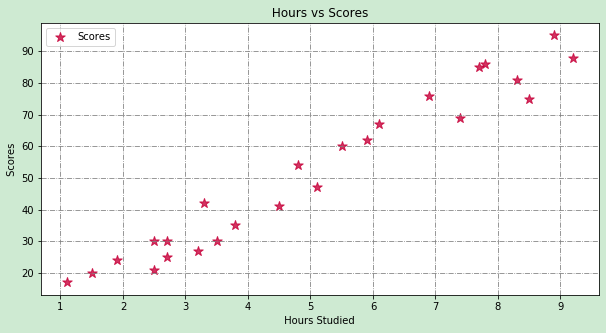

In [19]:
# Scatter Plot
plt.figure(figsize = (10,5),facecolor = "#CEEAD2",linewidth = 10.0,tight_layout = False)
plt.scatter(x,y, c = '#C70039', marker = '*' ,s = 100, alpha = 0.8)
plt.title(" Hours vs Scores ")
plt.xlabel(" Hours Studied ")
plt.ylabel(" Scores ")
plt.legend(['Scores'], loc = 'best')
plt.grid(True, color = 'gray', linestyle = "-.")
plt.show()

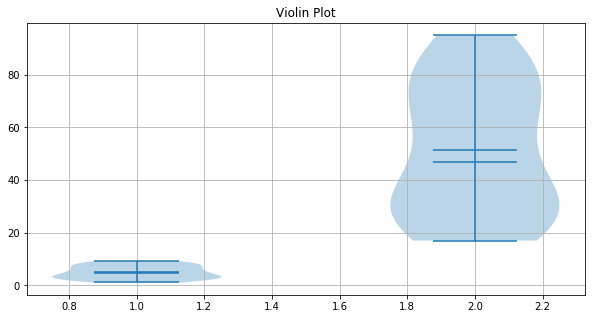

In [20]:
 # Violin Plot
plt.figure(figsize = (10,5))
hrs = dataset['Hours'].to_list()
scores = dataset['Scores'].to_list()
data = list([hrs,scores])
plt.violinplot(data, showmeans = True, showmedians = True)
plt.title("Violin Plot")
plt.grid(True)
plt.show()

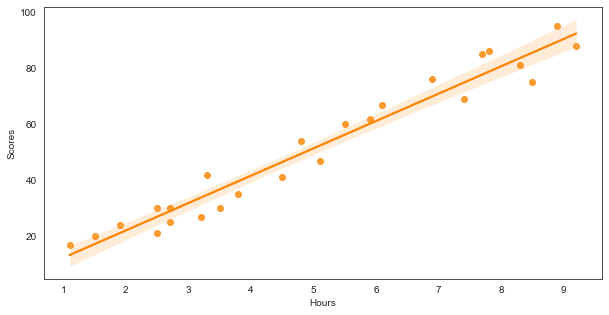

In [21]:
# Regression Plot
plt.figure(figsize = (10,5))
sns.set_style('white')
sns.regplot(x="Hours", y="Scores", data=dataset, color='#FB8502')

In [22]:
# Correlation
corr_df = dataset.corr()
corr_df

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


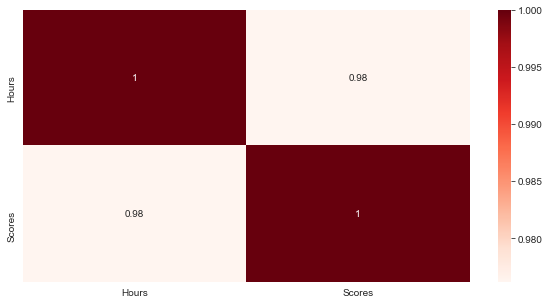

In [23]:
# heat Map
plt.figure(figsize=(10,5))
sns.heatmap(corr_df, cmap='Reds',annot=True)

### Preparing the data

In [24]:
x = dataset.iloc[:,:1]
y = dataset.iloc[:,1:]

In [25]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [26]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [27]:
# Spliting data into training & test sets
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30 ,random_state=0)

In [28]:
print("Test Set")
print(x_test.shape)
print(y_test.shape)

Test Set
(8, 1)
(8, 1)


In [29]:
print("Training Set")
print(x_train.shape)
print(y_train.shape)

Training Set
(17, 1)
(17, 1)


### Training the model 

In [30]:
# Training the model to make prediction
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
regressor.coef_

array([[9.78856669]])

In [32]:
regressor.intercept_

array([2.37081538])

### Predicting the model

In [33]:
# Predicting the scores
y_pred = regressor.predict(x_test)

In [34]:
y_pred = pd.DataFrame(y_pred,columns=['Predicted Values'])
y_pred.head()

,Predicted Values
0,17.053665
1,33.694229
2,74.806209
3,26.842232
4,60.123359


### Visualizing training set, testing set and regression line

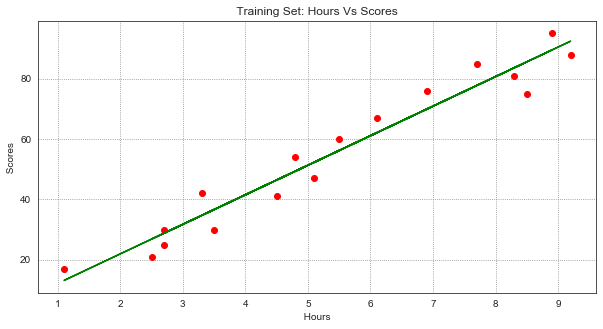

In [35]:
# Plotting & Visualizing training set & regression line
plt.figure(figsize = (10,5))
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, regressor.predict(x_train), color = "green")
plt.title(" Training Set: Hours Vs Scores ")
plt.xlabel(" Hours ")
plt.ylabel(" Scores ")
plt.grid(True, color = 'gray' , linestyle = ":")
plt.show()

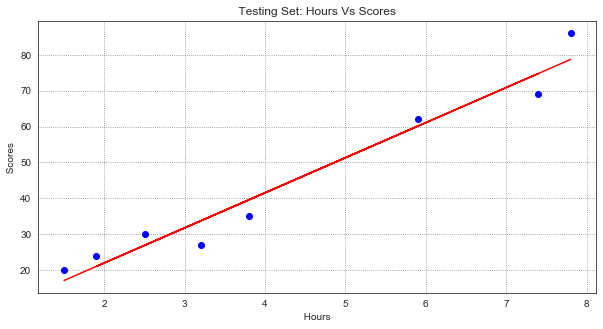

In [36]:
# Plotting & Visualizing training set & regression line
plt.figure(figsize = (10,5))
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_test, y_pred, color = "red")
plt.title(" Testing Set: Hours Vs Scores ")
plt.xlabel(" Hours ")
plt.ylabel(" Scores ")
plt.grid(True, color = 'gray' , linestyle = ":")
plt.show()

In [37]:
# To predict the score if the student studies for 9.25 hrs in a day
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.91505723]


### Evaluating the model

In [38]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.419727808027652


In [39]:
error = metrics.mean_squared_error(y_test,y_pred)
print ("Mean Square Error: ",error)

Mean Square Error:  22.96509721270043


In [40]:
print ('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Square Error:  4.792191274636315


In [41]:
print("R^2 score: ",metrics.r2_score(y_test, y_pred))

R^2 score:  0.9568211104435257
